In [2]:
import random
from lcp.src.problems.problems import Problems
from lcp.src.algorithm import Population, GeneticAlgorithm
from lcp.src.graphic.draw_container import draw

# import logging
# logging.basicConfig(level=#logging.debug)
# logging.basicConfig(filename='my_log.log', level=logging.DEBUG,
#                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

random.seed(42)

#Problems().generate(N_TYPES=20, BOX_SIDE_MIN=250, BOX_SIDE_MAX=750)
problems = Problems().load_problems()
problem = problems[0]
print(problem)

# Generar las soluciones
population = Population(problem).generate_random_individuals(100).evaluate()
print(population)

Problem with 20 box types and a container of size (l=12010, w=2330, h=2380)
Population with 100 individuals best: 39257


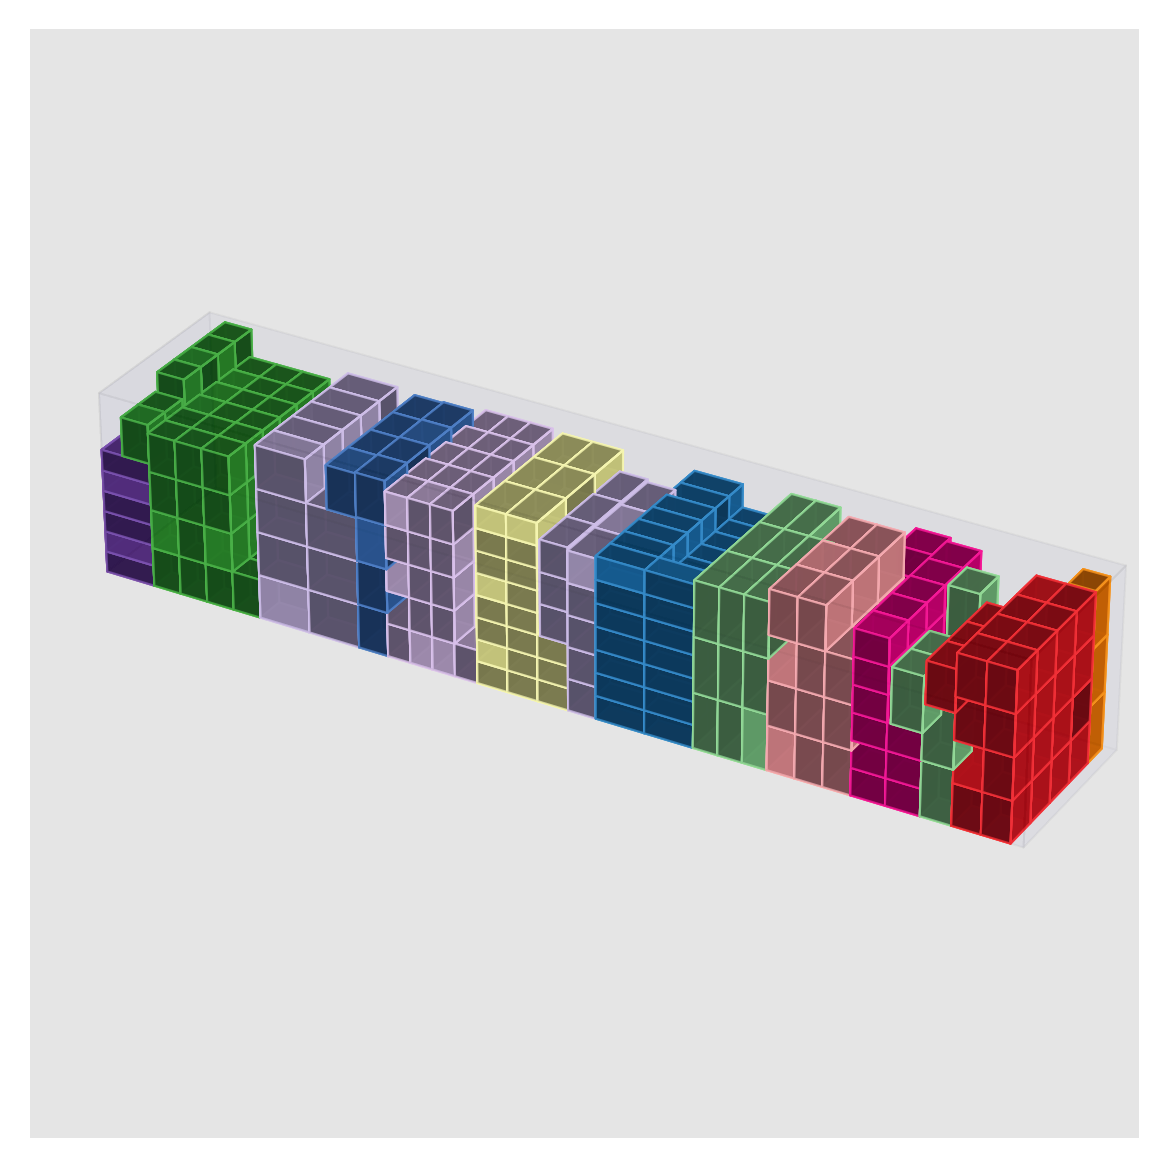

In [3]:
draw(population.best.result, '', problem.container)

In [4]:
from matplotlib import pyplot as plt
from IPython.display import clear_output


def on_generation(best_values, *args, **kwargs):
    # Dibujar un gráfico con la evolución de los valores
    clear_output(wait=True)
    plt.plot(best_values)
    plt.ylabel('Best Value')
    plt.xlabel('Generation')
    plt.show()


ga = GeneticAlgorithm(population=population).start()#on_generation)

-> Generation 0 best value: 39257
New elite:  40959 Old elite:  39257
-> Generation 1 best value: 40959
-> Generation 2 best value: 40959
-> Generation 3 best value: 40959
-> Generation 4 best value: 40959
-> Generation 5 best value: 40959
New elite:  41008 Old elite:  40959
-> Generation 6 best value: 41008
New elite:  43422 Old elite:  41008
-> Generation 7 best value: 43422
-> Generation 8 best value: 43422
New elite:  43482 Old elite:  43422
-> Generation 9 best value: 43482
New elite:  46869 Old elite:  43482
-> Generation 10 best value: 46869
-> Generation 11 best value: 46869
-> Generation 12 best value: 46869
-> Generation 13 best value: 46869
-> Generation 14 best value: 46869
New elite:  47236 Old elite:  46869
-> Generation 15 best value: 47236
-> Generation 16 best value: 47236
-> Generation 17 best value: 47236
-> Generation 18 best value: 47236
-> Generation 19 best value: 47236
New elite:  47679 Old elite:  47236
-> Generation 20 best value: 47679
-> Generation 21 best v

In [5]:
#ga.start(on_generation)

In [6]:
%matplotlib qt
%config InlineBackend.figure_format = 'retina'

r = ga.population.best.result
draw(r, '', problem.container)

In [7]:
ga.population.best

Chromosome(genes=[Gene(type=BoxType(length=577, width=307, height=262, type=0, min_count=40, max_count=106, value_individual=29, weight=29), box_count=49, rotation=0), Gene(type=BoxType(length=645, width=398, height=290, type=13, min_count=38, max_count=58, value_individual=49, weight=49), box_count=49, rotation=0), Gene(type=BoxType(length=351, width=616, height=582, type=4, min_count=9, max_count=48, value_individual=54, weight=54), box_count=38, rotation=1), Gene(type=BoxType(length=444, width=299, height=433, type=8, min_count=35, max_count=111, value_individual=78, weight=78), box_count=100, rotation=0), Gene(type=BoxType(length=439, width=431, height=357, type=15, min_count=32, max_count=91, value_individual=90, weight=90), box_count=79, rotation=0), Gene(type=BoxType(length=385, width=663, height=272, type=9, min_count=18, max_count=93, value_individual=69, weight=69), box_count=75, rotation=0), Gene(type=BoxType(length=361, width=369, height=508, type=3, min_count=48, max_count

In [12]:
from copy import deepcopy
from lcp.src.algorithm.chromosome import Improvement
b = deepcopy(ga.population.best)
print(b.fitness)
b.evaluate(improvement=Improvement.late)
print(b.fitness)
r2 = b.result
print([r.box_count for r in b.genes])
print([r.type.min_count for r in b.genes])
print([r.type.max_count for r in b.genes])
print([r.type.value_individual for r in b.genes])

draw(r2, '', problem.container)

(0.8, 691, 48835)
(0.82, 710, 49599)
[14, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[40, 38, 9, 35, 32, 18, 48, 7, 10, 34, 4, 17, 4, 31, 22, 15, 19, 13, 43, 25]
[106, 58, 48, 111, 91, 93, 87, 97, 40, 51, 46, 31, 14, 58, 39, 38, 56, 57, 46, 37]
[29, 49, 54, 78, 90, 69, 72, 70, 74, 98, 72, 71, 82, 12, 5, 36, 21, 30, 12, 60]


In [9]:
from lcp.src.algorithm.gene import Gene
from lcp.src.container.box_type import BoxType


genes = ga.population.best[-6:-4]
#genes[0].box_count = 1
#genes[1].box_count = 1
#genes = [Gene(type=BoxType(length=574, width=766, height=575, type=18, min_count=20, max_count=28, value_individual=252818300, weight=252818300), box_count=1, rotation=1),
# Gene(type=BoxType(length=430, width=328, height=328, type=6, min_count=83, max_count=107, value_individual=46261120, weight=46261120), box_count=1, rotation=0)]

In [10]:
from typing import Container
from lcp.src.algorithm.chromosome import Chromosome

solution = Chromosome(genes,container=problem.container)
solution.evaluate()
#draw(solution.result, '', problem.container)

In [11]:
from lcp.src.algorithm.chromosome import Chromosome
from lcp.src.algorithm.gene import Gene
from lcp.src.container.box_type import BoxType
from lcp.src.location.size import Size
#%matplotlib tk

genes = [Gene(type=BoxType(length=300, width=383, height=575,  type=4, min_count=22, max_count=26, value_individual=66067500, weight=66067500), box_count=24, rotation=0),
         Gene(type=BoxType(length=300, width=383, height=575,  type=17, min_count=22, max_count=25, value_individual=66067500,
              weight=66067500), box_count=25, rotation=1),
         Gene(type=BoxType(length=500, width=460, height=460,  type=5, min_count=60, max_count=94, value_individual=105800000, weight=105800000), box_count=94, rotation=1)]
e = Chromosome(genes=genes, container=problem.container)
e.evaluate()
#draw(e.result, '', problem.container)